In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df1=pd.read_csv('hr_employee_churn_data.csv')

In [76]:
#basic details about data,its rows and columns,etc
df1.shape

(14999, 10)

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [78]:
df1.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Feature Engineering before Model Building

## First step is  - removing unwanted feature.
#### eg, we have emp id, which is not playing any important role in the given dataset,so we can drop this

In [79]:
# But before dropping this feature, create a copy of dataset by creating new dataframe
df2=df1.copy()

In [80]:
#use drop() method to drop a feature
#inplace=column has to be dropped from the same dataframe
# Was getting Key Error : label not in axis by using the command :- df2.drop(['empid'],axiis=1,inplace=True)
#solved the error by the link :- https://stackoverflow.com/questions/54296214/axis-error-when-dropping-specific-columns-pandas/54296376#:~:text=You%20can%20not%20drop%20columns,x%5D)%20with%20X_train%3DX_train.
df2.drop(df1.columns[[0]], axis=1,inplace=True)

In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14997 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   salary                 14999 non-null  object 
 8   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [82]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


## Second step :- Handling missing values
#### We have to find out if any feature has missing values using the method :- isnull()

In [83]:
#handling missing values
# sum() - gives sum of missing values
df2.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [84]:
# Satisfaction level has 2 missing values
# We will try to fill these 2 missing values

In [85]:
# To fill the missing values, we have to see the stats of the column 'satisfaction_level', which we can see by using the describe() method
df2['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

#### Diff approaches of filling the missing values:-
##### 1) Either we can replace the missing values with mean,mode,median(average values)
##### 2) KNN impute library to impute missing values
#####                          --> KNN works by finding the distances between a query and all the examples in the data, selecting the specified number                                                    examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the                                                   labels (in the case of regression).

##### We will use method 1 - to fill the missing values with the mean of satisfaction_level

In [86]:
# To fill missing values, we use the method :- fillna()
# Inside fillna() - 
#                 --> Inside the bracket of fillna(), we have to write with what value we would like to fill the missing values
#                     We will fill it with mean of satisfaction_level, so df2['satisfaction_level'].mean()
#                 --> Inplace means :- Same column in the same feature has to get updated
df2['satisfaction_level'].fillna(df2['satisfaction_level'].mean(), inplace=True)

In [87]:
# Again running isnull() with satisfaction_level to check if the above command worked
df2.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

## Handling Categorical Features

In [88]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


##### In our dataset, the feature 'salary' is having string categorical values.
##### We will have to handle these categorical features first, because the ML model works only on numbers
### Before handling the categorical features, we will try to understand what unique values it has

In [89]:
# To see the unique values, we have to use a method called unique() on the particular feature
df2['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

#### For the below application of Pandas getDummies, look at GetDummiesExplaination.ipynb (explaination and example)

#### To handle the categorical features, we use a method called getDummies

In [90]:
# drop_first allows you to drop your first variable and identify it through all other columns being 0.
salary_dummies=pd.get_dummies(df2['salary'],drop_first=True)

In [91]:
salary_dummies
# we will combine these features with our original dataframe, df2

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [92]:
# using a method called concat, we can combine 2 data frames
df2=pd.concat([df2,salary_dummies],axis=1)
# axis = 1 :- combine dataframes at column level

In [93]:
df2.head()
#low medium from salary_dummies got added to df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,1,0
1,0.80,0.86,5,262,6,0,0,medium,1,0,1
2,0.11,0.88,7,272,4,0,0,medium,1,0,1
3,0.72,0.87,5,223,5,0,0,low,1,1,0
4,0.37,0.52,2,159,3,0,0,low,1,1,0


In [94]:
# since we have already converted the categorical feature "salary" into encoded feature by using get_dummies(), we don't need
# the column 'salary' anymore
df2.drop(['salary'],axis=1,inplace=True)

In [95]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,1,0
1,0.80,0.86,5,262,6,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,1,1,0
4,0.37,0.52,2,159,3,0,0,1,1,0


# Feature Engineering over. Now we split data into train and test set

## Before splitting the data, we have to split the dataset into X and Y, where 
## X = Independent Features
## Y = Target dependent variable

In [96]:
# split data set into features and label
# From the X variable, we drop target column
X = df2.drop(labels='left',axis=1)
# To get Y, we only need target column
Y = df2['left']

#### Now we can split X and Y into training and testing sets

In [97]:
# import a librari called : sklearn.model_selection, and the class would be train_test_split
# test_size=0.2 , i.e, 20% test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [98]:
len(X_train)

11999

In [99]:
len(X_test)

3000

# Model building and Model selection
### It is a supervised and classification type problem, and we have different type of algorithms for classification type problem
### In this example, we will take 2 algorithms:-
###                                                                        1) Random Forest Classifier
###                                                                        2) XG Boost Classifier

#### We will also perform hyper tuning for these algorithms and we will see which model gives the best result

### For hyper parameter tuning, we will use a library called grid_search_cv
## conda install -c conda-forge _py-xgboost-mutex : to get xgboost,through anaconda shell

In [100]:
# Random Forest and XGB Classifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# using GridSearchCV, we will find out that which model will give us the best result for the given dataset


#### Creating model parameter Dictionary variable (with random values)

In [101]:
model_param={
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators':[10,50,100,130],
            'criterion':['gini','entropy'],
            'max_depth':range(2,4,1),
            'max_features':['auto','log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
            'learning_rate':[0.5,0.1,0.01,0.001],
            'max_depth':[3,5,10,20],
            'n_estimators':[10,50,100,200],
            'use_label_encoder':[False]
        }
    }
}
# the variable param will be used with GridSearchCV to find the best models along with their scores

#### The command to apply GridSearchCV on the above 2 models
##### We are iterating through the dictionary variables for each model,
##### Then using GridSearchCV:- 
#####                                             -> estimator is the model name
#####                                             -> the param_grid will hold the model parameter, the expected random parameters
#####                                             -> cv( cross validation set) = 5, 
#####                                                      -> for each random sample of the parameters, it will run the grid search and try to fit ( in
#####                                                          model_selection.fit(X,Y)
#####                                              -> then append the score in score array object.The score array object will store the columns:-
#####                                                          - model name                    - best_score                      - best_params

In [102]:
scores=[]
for model_name,mp in model_param.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,Y)
    scores.append({
        'model':model_name,
        'best_score':model_selection.best_score_,
        'best_params':model_selection.best_params_
    }
    )

[10:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\tewar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(



[10:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

[10:08:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:10:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:11:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:13:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:14:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [104]:
scores
# The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. 
#To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing 
 #   XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
 # warnings.warn(label_encoder_deprecation_msg, UserWarning)

[{'model': 'RandomForestClassifier',
  'best_score': 0.9168612648660664,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'auto',
   'n_estimators': 50}},
 {'model': 'XGBClassifier',
  'best_score': 0.9902661776147605,
  'best_params': {'learning_rate': 0.1,
   'max_depth': 20,
   'n_estimators': 200,
   'use_label_encoder': False}}]

#### From above, we can deduce that XGBoostClassifier gives better accuracy


# Model Building

In [117]:
# Initializing model for XGBoostClassifier
# XGBClassifier is the class
#                      objective : default argument
model_xgb=XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=20,n_estimatoes=200,use_label_encoder=False)

#### Training the model with the Training dataset

In [118]:
eval_set = [(X_train, Y_train), (X_test, Y_test)]
eval_metric = ["auc","error"]

#### https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e
#### solved the warning of eval_set from here

In [121]:
%time model_xgb.fit(X_train, Y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[20:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimatoes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.97851	validation_0-error:0.01775	validation_1-auc:0.97974	validation_1-error:0.01767
[1]	validation_0-auc:0.98287	validation_0-error:0.01784	validation_1-auc:0.98181	validation_1-error:0.01900
[2]	validation_0-auc:0.98354	validation_0-error:0.01775	validation_1-auc:0.98153	validation_1-error:0.01767
[3]	validation_0-auc:0.98673	validation_0-error:0.01750	validation_1-auc:0.98465	validation_1-error:0.01733
[4]	validation_0-auc:0.98697	validation_0-error:0.01708	validation_1-auc:0.98506	validation_1-error:0.01900
[5]	validation_0-auc:0.98741	validation_0-error:0.01700	validation_1

[72]	validation_0-auc:0.99994	validation_0-error:0.00325	validation_1-auc:0.99605	validation_1-error:0.00967
[73]	validation_0-auc:0.99994	validation_0-error:0.00325	validation_1-auc:0.99604	validation_1-error:0.00967
[74]	validation_0-auc:0.99995	validation_0-error:0.00308	validation_1-auc:0.99604	validation_1-error:0.00967
[75]	validation_0-auc:0.99995	validation_0-error:0.00308	validation_1-auc:0.99600	validation_1-error:0.01000
[76]	validation_0-auc:0.99995	validation_0-error:0.00283	validation_1-auc:0.99600	validation_1-error:0.01000
[77]	validation_0-auc:0.99996	validation_0-error:0.00267	validation_1-auc:0.99600	validation_1-error:0.01000
[78]	validation_0-auc:0.99996	validation_0-error:0.00258	validation_1-auc:0.99601	validation_1-error:0.01000
[79]	validation_0-auc:0.99996	validation_0-error:0.00250	validation_1-auc:0.99602	validation_1-error:0.01000
[80]	validation_0-auc:0.99996	validation_0-error:0.00233	validation_1-auc:0.99602	validation_1-error:0.01033
[81]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimatoes=200, n_estimators=100, n_jobs=4, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [123]:
model_xgb.score(X_test,Y_test)

C:\Users\tewar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.991

### Now we evaluate the model with the test data:-

In [124]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,0,1
13378,0.55,0.96,3,194,3,0,0,0,1
10233,0.72,0.67,5,210,2,0,0,0,1
4719,0.96,0.75,4,177,2,0,0,1,0
7003,0.96,0.54,3,198,3,0,0,1,0


In [125]:
#checking the 1st row:
X_test[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,0,1


#### Now we will pass the first row to the model and generate the prediction value.
#### We will use predict() method

In [126]:
model_xgb.predict(X_test[:1])

array([1])

### 1 = employee left

### We will check the original dataset to see if the predicted value is correct

In [127]:
# 1670 = row number
df1.loc[1670]

empid                      1671
satisfaction_level         0.44
last_evaluation            0.57
number_project                2
average_montly_hours        141
time_spend_company            3
Work_accident                 0
promotion_last_5years         0
salary                   medium
left                          1
Name: 1670, dtype: object

## Checking confusion matrix ( since this is a classification problem)

In [128]:
# confusion matrix will be used to get the count of true values w.r.t predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,model_xgb.predict(X_test))
cm

C:\Users\tewar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([[2293,    6],
       [  21,  680]], dtype=int64)

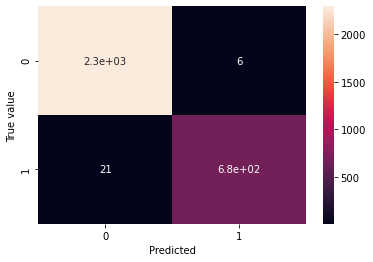

In [129]:
# ploting the graph of confusion matrix
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')
plt.show()

In [130]:
# for 1:-685 got predicted, 16 predicted wrongly
# for 0 :- 2293 correctly predicted